In [3]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 281.8 kB/s eta 0:00:01
   ------------- ------------------------ 102.4/294.9 kB 492.8 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 554.9 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 695.5 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.9 kB 724.0 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 806.1 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 759.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\megha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("D:/Excel/Project/Sample - Superstore.csv", encoding='ISO-8859-1')


In [2]:
# Check for nulls
df.isnull().sum()

# Drop rows with critical nulls or fill if appropriate
df.dropna(inplace=True)  # or use df.fillna(method='ffill')


In [3]:
# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [4]:
# Use IQR method for Profit
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Profit'] >= Q1 - 1.5 * IQR) & (df['Profit'] <= Q3 + 1.5 * IQR)]

In [5]:
#EDA Task
print("Shape:", df.shape)
print("Data Types:\n", df.dtypes)
print("Summary Stats:\n", df.describe())

Shape: (8113, 21)
Data Types:
 Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object
Summary Stats:
             Row ID                     Order Date  \
count  8113.000000                           8113   
mean   4997.032171  2016-05-01 01:12:35.676075520   
min       1.000000            2014-01-03 00:00:00   
25%    2499.000000            2015-05-25 00:00:00   
50

In [6]:
# Value counts
print(df['Region'].value_counts())
print(df['Category'].value_counts())

# Groupby aggregations
sales_by_region = df.groupby('Region')['Sales'].sum()
profit_by_category = df.groupby('Category')['Profit'].sum()

Region
West       2708
East       2248
Central    1842
South      1315
Name: count, dtype: int64
Category
Office Supplies    5341
Furniture          1494
Technology         1278
Name: count, dtype: int64


In [7]:
# Correlation matrix
corr = df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()
print(corr)

             Sales    Profit  Discount  Quantity
Sales     1.000000  0.322309 -0.037185  0.162896
Profit    0.322309  1.000000 -0.431420  0.182883
Discount -0.037185 -0.431420  1.000000  0.008275
Quantity  0.162896  0.182883  0.008275  1.000000


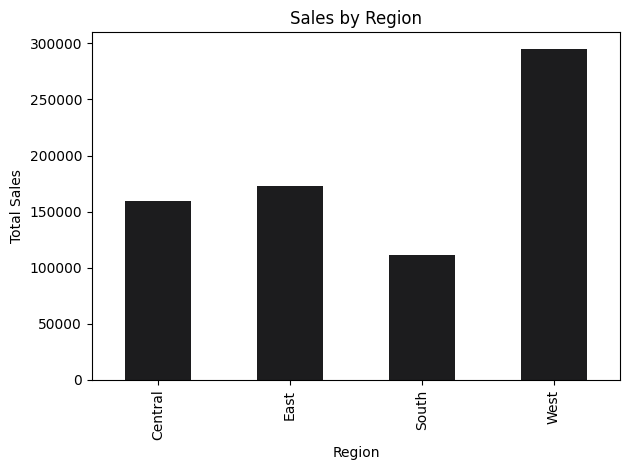

In [8]:
sales_by_region.plot(kind='bar', color='#1C1C1E')
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


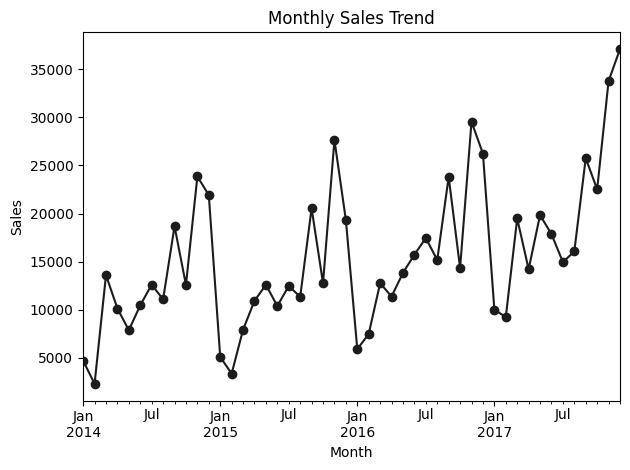

In [9]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.plot(kind='line', marker='o', color='#1C1C1E')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

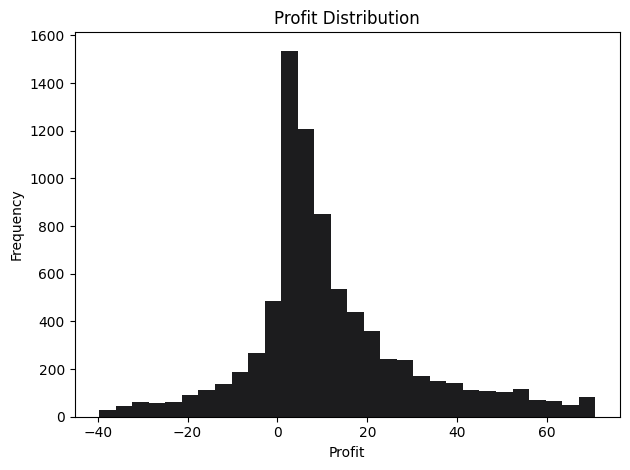

In [10]:
plt.hist(df['Profit'], bins=30, color='#1C1C1E')
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


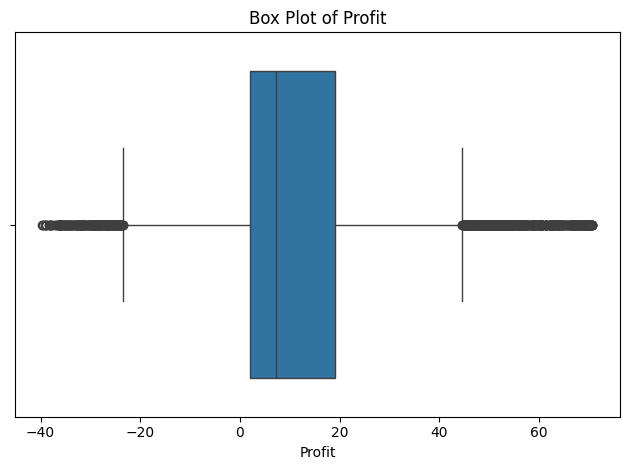

In [11]:
sns.boxplot(x=df['Profit'])
plt.title("Box Plot of Profit")
plt.tight_layout()
plt.show()


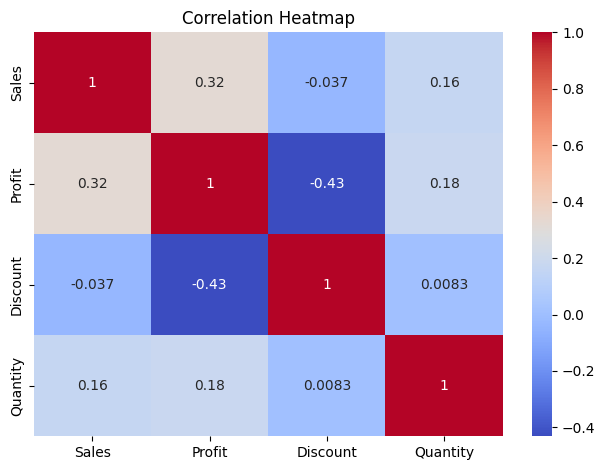

In [12]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
